In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import transformations as tf

In [48]:
gt_positions = np.loadtxt('rtabmap_kinect/gt_positions.txt')
gt_rotations = np.loadtxt('rtabmap_kinect/gt_rotations.txt')
gt_timestamps = np.loadtxt('rtabmap_kinect/gt_times.txt')
slam_positions = np.loadtxt('rtabmap_kinect/slam_positions.txt')
slam_rotations = np.loadtxt('rtabmap_kinect/slam_rotations.txt')
slam_timestamps = np.loadtxt('rtabmap_kinect/slam_times.txt')
gt_positions = gt_positions[:-1]
gt_rotations = gt_rotations[:-1]
gt_timestamps = gt_timestamps[:-1]

In [49]:
print(gt_positions.shape, gt_rotations.shape, gt_timestamps.shape)

(596, 3) (596, 4) (596,)


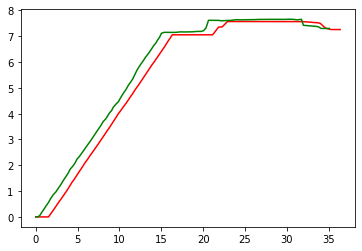

In [55]:
plt.plot(gt_timestamps - gt_timestamps[0], gt_positions[:, 0], color='r')
plt.plot(slam_timestamps - slam_timestamps[0], slam_positions[:, 0], color='g')

In [70]:
gt_positions_sync = []
gt_rotations_sync = []
for i in range(len(slam_timestamps)):
    for j in range(1, len(gt_timestamps)):
        if gt_timestamps[j] > slam_timestamps[i]:
            break
    print(slam_timestamps[i] - gt_timestamps[j - 1], gt_timestamps[j] - gt_timestamps[j - 1])
    duration = gt_timestamps[j] - gt_timestamps[j - 1]
    alpha = (slam_timestamps[i] - gt_timestamps[j - 1]) / duration
    print(alpha)
    position = alpha * gt_positions[j] + (1 - alpha) * gt_positions[j - 1]
    rotation = alpha * gt_rotations[j] + (1 - alpha) * gt_rotations[j - 1]
    print(gt_positions[j - 1])
    print(gt_positions[j])
    print(position)
    print()
    gt_positions_sync.append(position)
    gt_rotations_sync.append(rotation)

0.0623784065246582 0.06633758544921875
0.9403177113283496
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]

0.055829524993896484 0.0574183464050293
0.9723290287754848
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]

0.06998205184936523 0.07952761650085449
0.8799716994990452
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]

0.05625414848327637 0.05811166763305664
0.9680353494325874
[0. 0. 0.]
[2.99997e-02 7.34782e-18 0.00000e+00]
[2.90407701e-02 7.11294950e-18 0.00000000e+00]

0.06834602355957031 0.07602787017822266
0.8989601234304637
[1.19999e-01 2.93913e-17 0.00000e+00]
[1.49999e-01 3.67391e-17 0.00000e+00]
[1.46967804e-01 3.59966792e-17 0.00000000e+00]

0.06867218017578125 0.07541608810424805
0.9105773304080071
[2.39998e-01 5.87825e-17 0.00000e+00]
[2.69998e-01 6.61303e-17 0.00000e+00]
[2.67315320e-01 6.54732401e-17 0.00000000e+00]

0.06858634948730469 0.0762183666229248
0.8998664301823994
[3.59997e-01 8.81738e-17 0.00000e+00]
[3.89997e-01 9.55216e-17 0.00000e+00]
[3.86992993e-01 9.47858386e-17 0.00000000e+00]

0.0681352615356445

In [72]:
gt_positions_sync = np.array(gt_positions_sync)
gt_rotations_sync = np.array(gt_rotations_sync)

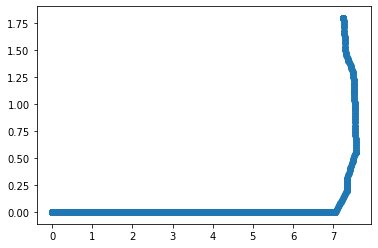

In [73]:
plt.scatter(gt_positions[:, 0], gt_positions[:, 1])

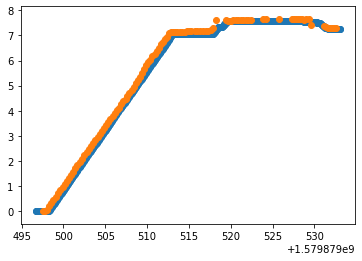

In [74]:
plt.scatter(gt_timestamps, gt_positions[:, 0])
plt.scatter(slam_timestamps, slam_positions[:, 0])

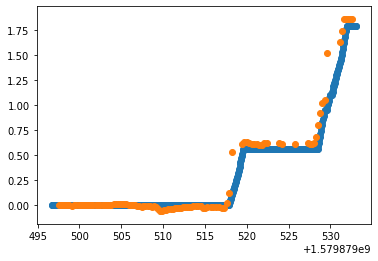

In [75]:
plt.scatter(gt_timestamps, gt_positions[:, 1])
plt.scatter(slam_timestamps, slam_positions[:, 1])

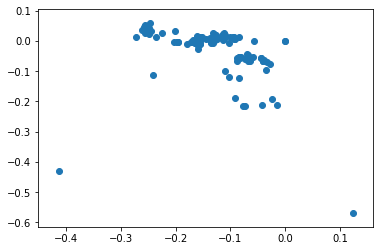

In [76]:
plt.scatter(gt_positions_sync[:, 0] - slam_positions[:, 0], gt_positions_sync[:, 1] - slam_positions[:, 1])

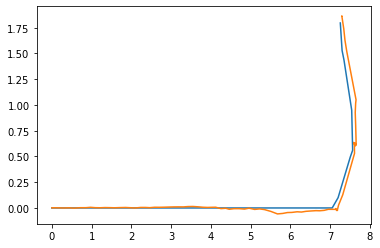

In [77]:
plt.plot(gt_positions_sync[:, 0], gt_positions_sync[:, 1])
plt.plot(slam_positions[:, 0], slam_positions[:, 1])

In [78]:
print(np.sum((gt_positions_sync - slam_positions) ** 2, axis=1).mean())

0.033928035831320924


In [79]:
slam_rotations_sxyz = slam_rotations.copy()
slam_rotations_sxyz[:, 0] = slam_rotations[:, 3]
slam_rotations_sxyz[:, 1] = slam_rotations[:, 0]
slam_rotations_sxyz[:, 2] = slam_rotations[:, 1]
slam_rotations_sxyz[:, 3] = slam_rotations[:, 2]

In [80]:
gt_rotations_sxyz = gt_rotations_sync.copy()
gt_rotations_sxyz[:, 0] = gt_rotations_sync[:, 3]
gt_rotations_sxyz[:, 1] = gt_rotations_sync[:, 0]
gt_rotations_sxyz[:, 2] = gt_rotations_sync[:, 1]
gt_rotations_sxyz[:, 3] = gt_rotations_sync[:, 2]

In [81]:
slam_orientations = np.array([tf.euler_from_quaternion(q, axes='sxyz') for q in slam_rotations_sxyz])
gt_orientations = np.array([tf.euler_from_quaternion(q, axes='sxyz') for q in gt_rotations_sxyz])

In [82]:
slam_poses = np.hstack([slam_positions, slam_orientations])
gt_poses = np.hstack([gt_positions_sync, gt_orientations])

In [83]:
print(slam_poses.shape, gt_poses.shape)

(110, 6) (110, 6)


In [84]:
np.savetxt('rtabmap_kinect/slam_poses.txt', slam_poses)
np.savetxt('rtabmap_kinect/gt_poses.txt', gt_poses)

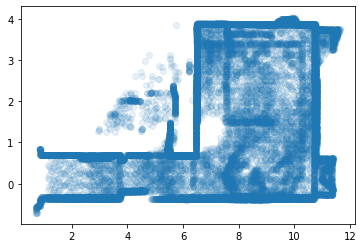

In [17]:
gt_points = np.loadtxt('groundtruth/points.txt')
plt.scatter(gt_points[::10, 0], gt_points[::10, 1], alpha=0.1)